In [1]:
import pandas as pd
import numpy as np

file = 'DATA/Rome_PLACEMENTS_DATA.xlsx'

file_read = pd.read_excel( file )
file_data = pd.DataFrame( file_read )
file_data

,Unnamed: 0,winner,finalist,semi1,semi2,q1,q2,q3,q4,o1,...,32_7,32_8,32_9,32_10,32_11,32_12,32_13,32_14,32_15,32_16
0,2014,DJOKOVIC,NADAL,DIMITROV,RAONIC,MURRAY,FERRER,CHARDY,HAAS,YOUZHNY,...,GRANOLLERS,BOLELLI,ANDERSON,KARLOVIC,GOLUBEV,SIJSLING,ROBREDO,ROSOL,ROBERT,CILIC
1,2015,DJOKOVIC,FEDERER,FERRER,WAWRINKA,NISHIKORI,BERDYCH,NADAL,GOFFIN,BELLUCCI,...,GASQUET,MONACO,DIMITROV,LOPEZ,SIMON,TSONGA,BAUTISTA,KOHLSCHREIBER,MAYER,DOLGOPOLOV
2,2016,MURRAY,DJOKOVIC,NISHIKORI,POUILLE,NADAL,GOFFIN,THIEM,MONACO,BELLUCCI,...,VINOLAS,GARCIA,RAONIC,SEPPI,SOCK,SOUSA,BAUTISTA,ANDERSON,MAHUT,GULBIS
3,2017,ZVEREV,DJOKOVIC,THIEM,ISNER,DelPOTRO,NADAL,RAONIC,CILIC,BAUTISTA,...,FERRER,CUEVAS,VERDASCO,BERLOCQ,VESELY,CARRENO,TROICKI,EDMUND,FlorianMAYER,STRUFF
4,2018,NADAL,ZVEREV,DJOKOVIC,CILIC,FOGNINI,GOFFIN,CARRENO,NISHIKORI,SHAPOVALOV,...,ANDERSON,ISNER,CECCHINATO,JOHNSON,BASILASHVILI,SOCK,SCHWARTZMAN,POUILLE,SONEGO,HAASE
5,2019,NADAL,DJOKOVIC,SCHWARTZMAN,TSITSIPAS,DelPOTRO,VERDASCO,FEDERER,NISHIKORI,KOHLSCHREIBER,...,GOFFIN,SINNER,CILIC,ALBOT,BAUTISTA,NORRIE,DJERE,CECCHINATO,KYRGIOS,VINOLAS
6,2020,DJOKOVIC,SCHWARTZMAN,RUUD,SHAPOVALOV,KOEPFER,NADAL,BERRETTINI,DIMITROV,KRAJINOVIC,...,FOGNINI,MILLMAN,RUBLEV,MARTINEZ,RAONIC,NISHIOKA,CECCHINATO,NISHIKORI,SONEGO,CORIC
7,2021,NADAL,DJOKOVIC,SONEGO,OPELKA,TSITSIPAS,ZVEREV,RUBLEV,DelBONIS,FOKINA,...,STRUFF,SCHWARTZMAN,MILLMAN,GARIN,CARRENO,GOFFIN,TRAVAGLIA,NORRIE,MUSETTI,MAGER


In [154]:
def ricerca_trend_players( partita, dataframe_torneo, anno_corrente, nome_torneo ) :
    import matplotlib.pyplot as plt
    n1 = partita.split("_")[0]
    n2 = partita.split("_")[1]
    dict_placements = {1:7,
                       2:6,
                       3:5, 4:5,
                       5:4, 6:4, 7:4, 8:4,
                       9:3, 10:3, 11:3, 12:3, 13:3, 14:3, 15:3, 16:3,
                       17:2, 18:2, 19:2, 20:2, 21:2, 22:2, 23:2, 24:2, 
                       25:2, 26:2, 27:2, 28:2, 29:2, 30:2, 31:2, 32:2 }
    dict_anni = {'2014':0,
                 '2015':1,
                 '2016':2,
                 '2017':3,
                 '2018':4,
                 '2019':5,
                 '2020':6,
                 '2021':7 }
    years = dataframe_torneo.iloc[:,0]
    idx_3_prev_ys = []
    for idx, v in enumerate ( years ) :
        if int( v )==anno_corrente :
            idx_3_prev_ys.append( idx-3 )
            idx_3_prev_ys.append( idx-2 )
            idx_3_prev_ys.append( idx-1 )
    n1_1 = 0
    n1_2 = 0
    n1_3 = 0
    for idx,v in enumerate ( dataframe_torneo.iloc[idx_3_prev_ys[2],:] ) :
        if n1==v :
            n1_1 = n1_1+idx
    for idx,v in enumerate ( dataframe_torneo.iloc[idx_3_prev_ys[1],:] ) :
        if n1==v :
            n1_2 = n1_2+idx
    for idx,v in enumerate ( dataframe_torneo.iloc[idx_3_prev_ys[0],:] ) :
        if n1==v :
            n1_3 = n1_3+idx
    
    n2_1 = 0
    n2_2 = 0
    n2_3 = 0
    for idx,v in enumerate ( dataframe_torneo.iloc[idx_3_prev_ys[2],:] ) :
        if n2==v :
            n2_1 = n2_1+idx
    for idx,v in enumerate ( dataframe_torneo.iloc[idx_3_prev_ys[1],:] ) :
        if n2==v :
            n2_2 = n2_2+idx
    for idx,v in enumerate ( dataframe_torneo.iloc[idx_3_prev_ys[0],:] ) :
        if n2==v :
            n2_3 = n2_3+idx
    
    n1_list = []
    n1_list.append( n1_3 )
    n1_list.append( n1_2 )
    n1_list.append( n1_1 )
    n1_list_data = pd.DataFrame()
    n1_list_data['cols1'] = n1_list
    
    points_n1 = n1_list_data['cols1'].map( dict_placements )
    
    n2_list = []
    n2_list.append( n2_3 )
    n2_list.append( n2_2 )
    n2_list.append( n2_1 )
    n2_list_data = pd.DataFrame()
    n2_list_data['cols2'] = n2_list
    
    points_n2 = n2_list_data['cols2'].map( dict_placements )
    
    passi = [ -3, -2, -1 ]
    
    points_n1 = pd.Series( points_n1 )
    points_n1 = points_n1.fillna( -1 )
    
    points_n2 = pd.Series( points_n2 )
    points_n2 = points_n2.fillna( -1 )
    
    
    plt.figure( figsize=(10,10) )
    plt.plot( passi, points_n1,'-o', label=n1 )
    plt.plot( passi, points_n2,'-o', label=n2 )
    plt.xticks([-3,-2,-1],['3 anni fa','2 anni fa','anno scorso'])
    plt.yticks([-1,2,3,4,5,6,7],['NaN','32s','OTT','QRT','SF','F','W'])
    plt.title( nome_torneo )
    plt.legend()
    plt.grid()
    plt.show()
    
    
    
    
            
            
        
            

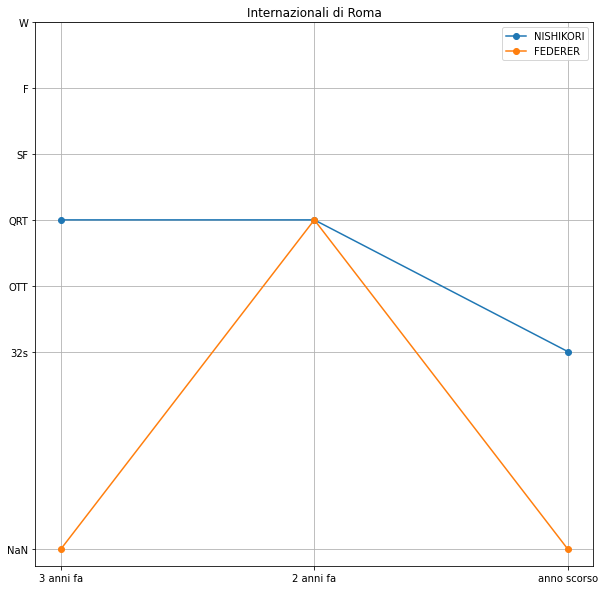

In [159]:
ricerca_trend_players("NISHIKORI_FEDERER", file_data, 2021, "Internazionali di Roma" )